In [15]:
# imports
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

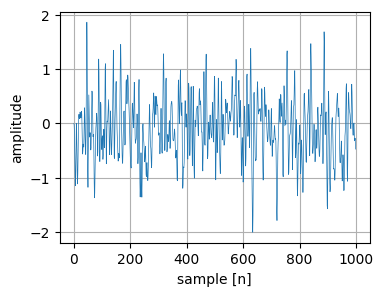

In [21]:
# signal generation
# random Gaussian noise
n = np.random.randn(1000)
# low-pass filter
b, a = butter(5, np.pi/10, btype='low', analog=False)
# filtered noise
x = lfilter(b, a, n)
plt.figure(figsize=(4,3))
plt.plot(x,linewidth=0.5)
plt.xlabel('sample [n]')
plt.ylabel('amplitude')
plt.grid()
plt.savefig('signal.jpeg',dpi=400, bbox_inches='tight')
plt.show()

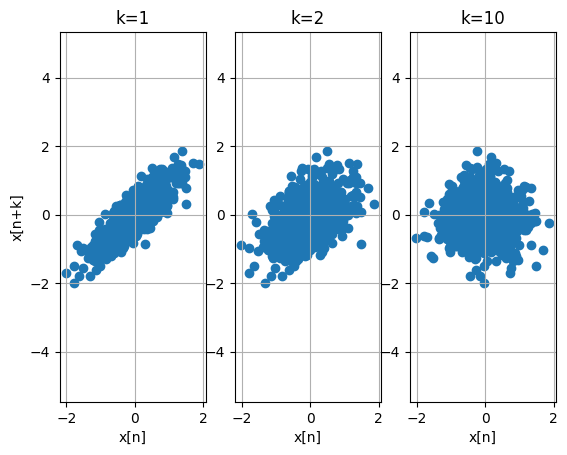

In [45]:
k_values = [1,2,10]
for i, k in enumerate(k_values):
  # i - index
  # k - value = k_values[i]
  plt.subplot(1,3,i+1)
  plt.scatter(x[:-k],x[k:])
  plt.xlabel('x[n]')
  if i == 0:
    plt.ylabel('x[n+k]')
  plt.axis('equal')
  plt.title(f'k={k}')
  plt.grid()
plt.show()

In [41]:
# a1
a = []
for i, k in enumerate(k_values):
  X = x[:-k].reshape(-1,1)
  y = x[k:]
  a.append(np.linalg.lstsq(X, y, rcond=None)[0])
print(np.array(a).squeeze())

[0.85312742 0.50482928 0.04670384]


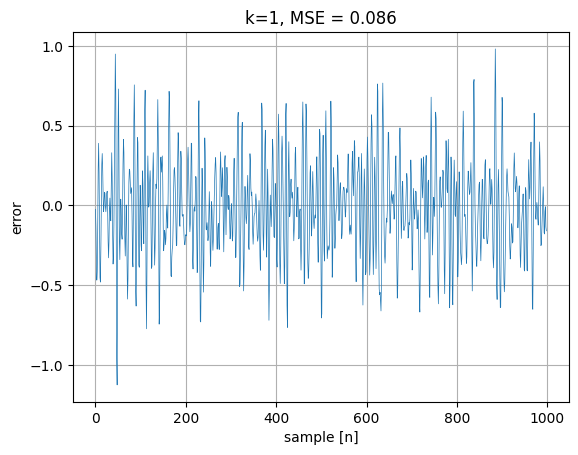

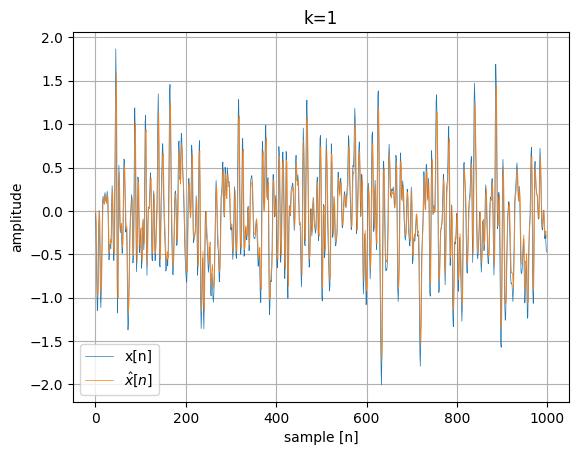

In [51]:
y_hat = a[0]*x[:-1]
e = x[1:] - y_hat
plt.plot(e,linewidth=0.5)
plt.xlabel('sample [n]')
plt.ylabel('error')
plt.grid()
plt.title(f'k=1, MSE = {np.mean(e**2):.3f}')
plt.savefig('error.jpeg',dpi=400, bbox_inches='tight')
plt.show()
plt.plot(x[1:],linewidth=0.5,label='x[n]')
plt.plot(y_hat,linewidth=0.5,label=r'$\hat{x}[n]$')
plt.legend()
plt.xlabel('sample [n]')
plt.ylabel('amplitude')
plt.title('Prediction for k=1')
plt.grid()
plt.savefig('data_hat.jpeg',dpi=400, bbox_inches='tight')
plt.show()
#y_hat = np.array(a).squeeze() * x[:-k_values[-1]]

In [61]:
Rx1 = np.sum(x[:-1]*x[1:])
Rx2 = np.sum(x[:-2]*x[2:])
Rx10 = np.sum(x[:-10]*x[10:])

In [67]:
rho1 = Rx1/np.sum(x ** 2)
rho2 = Rx2/np.sum(x ** 2)
rho10 = Rx10/np.sum(x ** 2)

In [72]:
print(sum(e ** 2), sum(x ** 2)*(1-rho1**2))
print(sum(x ** 2)*(1-rho2**2))
print(sum(x ** 2)*(1-rho10**2), np.sum(x ** 2))

85.89206746562795 86.05463528911667
234.88961916416642
314.2966245051345 314.9805171095945
